# K-Means Clustering
#### K. Igwe

### Types of clustering 
 - hard and 
 - soft clustering
 
Conventional k-means requires only a few steps. The first step is to randomly select k centroids, where k is equal to the number of clusters you choose. Centroids are data points representing the center of a cluster.

# Choosing the appropriate number of clusters!
 - the algorithm is sensitive to the randomly-chosen cluster centers.
 - Similarly, k-means is sensitive to the number of clusters-k; the choice requires a delicate balance. 
 - Setting k to be very large will improve the homogeneity of the clusters, and at the same time, it risks overfitting the data.
 - Ideally, you will have a priori knowledge (a prior belief) about the true groupings and you can apply this information to choosing the number of clusters.
 - Sometimes the number of clusters is dictated by business requirements or the motivation for the analysis.
 - Without any prior knowledge, one rule of thumb suggests setting k equal to the square root of (n / 2), where n is the number of examples in the dataset. 
- However, this rule of thumb is likely to result in an unwieldy number of clusters for large datasets.
- NB **elbow method** is going to be used in this example.

## Using the elbow method to find the optimal number of clusters

 - the elbow method attempts to gauge how the homogeneity or heterogeneity within the clusters changes for various values of k. 
 - the homogeneity within clusters is expected to increase as additional clusters are added; 
 - similarly, heterogeneity will also continue to decrease with more clusters. 
 - the goal is not to maximize homogeneity or minimize heterogeneity, but rather to find k so that there are diminishing returns beyond that point. 
 - This value of k is known as the elbow point.

### Elbow Point
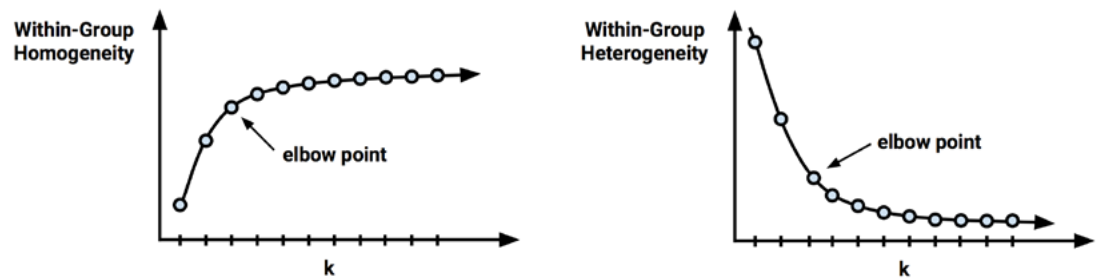


## Visualising the clusters

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#import sklearn.cluster.KMeans

In [2]:
#load data
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Rename Genre to Gender (donated by De Raven)
df = df.rename(columns={"Genre":"Gender"})

In [7]:
# Encode the Gender (Donated by Werner)
df["Gender"] = df["Gender"].apply(lambda x: 1 if x=="Female" else 0)

In [8]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [9]:
# Encode Gender (Doneted by Adam)
#le = LabelEncoder() 
#df['Gender'] = le.fit_transform(df['Gender'])
#df.head()

Text(0.5, 0, 'Gender')

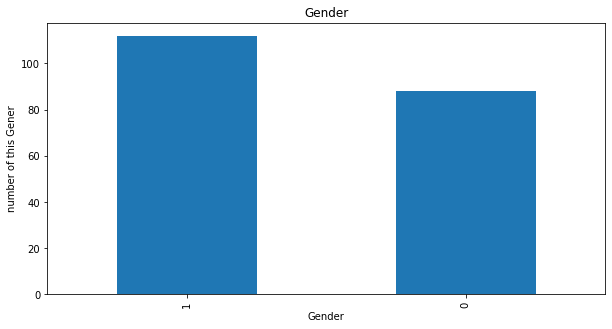

In [10]:
# The ratio by Gender (Donated by Francois)
df.Gender.value_counts().plot(kind='bar', 
                              figsize =(10,5))
plt.title("Gender") 
plt.ylabel('number of this Gener') 
plt.xlabel('Gender')

Text(0, 0.5, 'Annual Income')

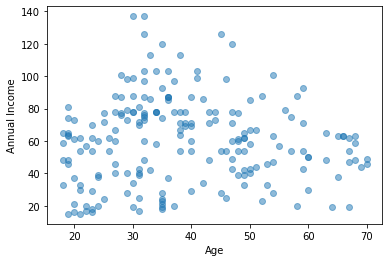

In [11]:
# Scatter plot of my data colored by Gender (Donated by Werner)
plt.scatter(df.Age,df['Annual Income (k$)'], alpha=0.5) 
plt.xlabel('Age')
plt.ylabel('Annual Income')

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

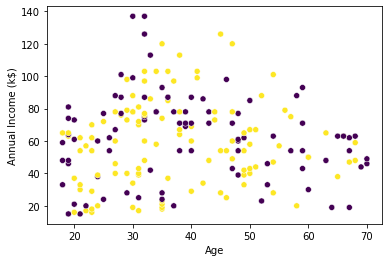

In [12]:
# Scatter plot of my data colored by Gender (Donated by Charl)
sns.scatterplot(x = df['Age'], y= df['Annual Income (k$)'],c = df.Gender)

Text(0, 0.5, 'Spending Score (1-100)')

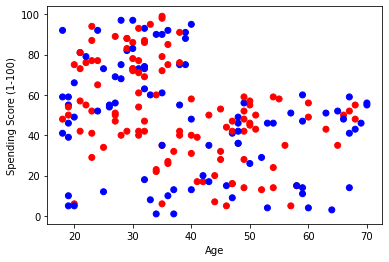

In [13]:
# More on Scatter plot (Donated by De Raven and Rialdo)
colors={1:'Red',0:'Blue'} 
plt.scatter(df.Age,df['Spending Score (1-100)'],c=df["Gender"].map(colors)) 
plt.xlabel('Age') 
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Spending Score (1-100)')

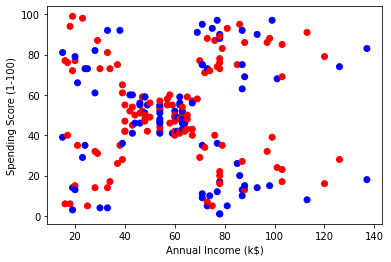

In [14]:
colors={1:'Red',0:'Blue'} 
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],c=df["Gender"].map(colors)) 
plt.xlabel('Annual Income (k$)') 
plt.ylabel('Spending Score (1-100)')

In [15]:
# Determine the optimal number of clusters by evaluating K for K = 2 to N.
#(Donated by Werner)
def plot_cluster_inertia(dataset):
    num_clusters = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14, 15]
    inertias = []
    
    for i in range(len(num_clusters)):
        clust = KMeans(n_clusters = i+1)
        clust.fit(dataset)
        inertias.append(clust.inertia_)
        
    plt.plot(num_clusters, inertias, "-o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of squared distances of samples\n to their closest cluster centre")
    plt.show()
    

C:\Users\igwek\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


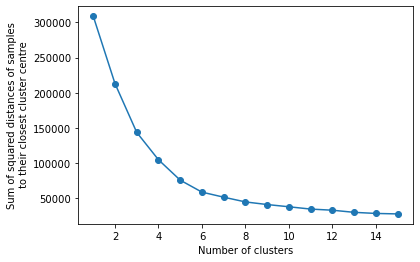

In [16]:
#Function call: plots num_clusters against inertias
plot_cluster_inertia(df)

In [28]:
# function to plot/evaluate selected number of cluster

def plot_cluster(x, num_cluster, rand_state = 42):
    
    #create an instance of KMeans
    kmeans = KMeans(n_clusters = num_cluster, init = 'k-means++', random_state = rand_state)
    y_pred = kmeans.fit_predict(x)
  
    colours = 'rbgcmy'
    
    for i in range(num_cluster):
        plt.scatter(x[y_pred == i, 0], x[y_pred == i, 1], c = colours[i], label = 'Cluster {}'.format(i))
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i, 1], marker = "x", c = 'black')
        
    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'),2)
    plt.title('{} clusters with silhouette={}'.format(num_cluster, score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Annual Income') 
    plt.ylabel("Spending")
    plt.legend()
    plt.show()
    

#### Call the function and take note of the silhouette score

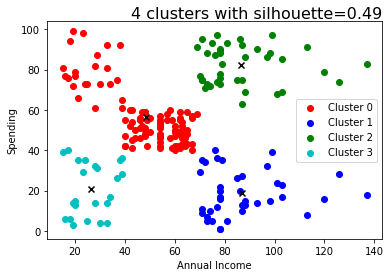

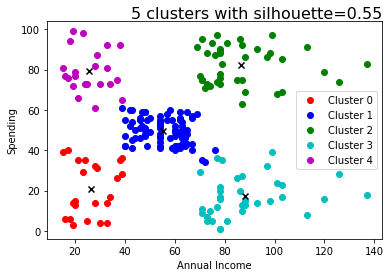

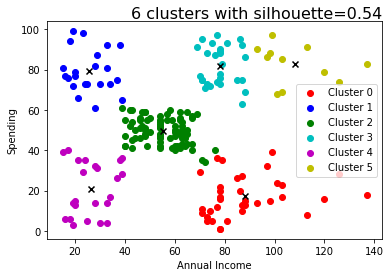

In [29]:
# Function call:
for k in range(4, 7):
    plot_cluster(df[['Annual Income (k$)','Spending Score (1-100)']].values,k,40) 


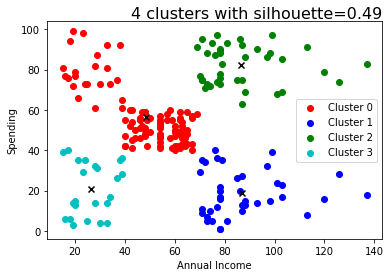

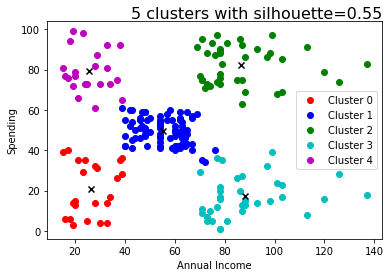

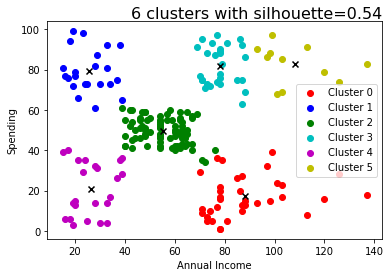

In [30]:
# same this as above
X =  df[['Annual Income (k$)','Spending Score (1-100)']].values.reshape(-1,2) 
for k in range(4, 7):
    plot_cluster(X,k,40) 